<a href="https://colab.research.google.com/github/RayirthDinesh/Autism-Spectrum-Disorder-ASD-Prediction/blob/main/ASDPredictionRayirth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [ ]:
#imports
from google.colab import files
from keras.regularizers import l2
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Data Collection

In [ ]:
#uploading test and train data

#https://www.kaggle.com/competitions/autismdiagnosis/data - Download train.csv and upload it here

uploaded = files.upload()

In [ ]:
#loading data
autism_data = pd.read_csv("train.csv")


**Collect information about the data**


1.   Check for number of samples and features
2.   Number of Null Values




In [ ]:
# Get the number of samples (rows)
num_samples = autism_data.shape[0]

# Get the number of features (columns)
num_features = autism_data.shape[1]

print(f'The dataset has {num_samples} samples and {num_features} features.')
autism_data.head()

The dataset has 800 samples and 22 features.


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [ ]:
#check for null values
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
#check for statistical measure of the dataset
autism_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.582500,0.493455,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.286250,0.452290,0.000000,0.000000,0.000000,1.000000,1.000000
A3_Score,800.0,0.321250,0.467249,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.457500,0.498502,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.208750,0.406670,0.000000,0.000000,0.000000,0.000000,1.000000
A7_Score,800.0,0.273750,0.446161,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.717500,0.450497,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.316250,0.465303,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
#value counts on categorical columns
print('*** Relation ***')
print(autism_data['relation'].value_counts())

print('\n\n*** Ethnicity ***')
print(autism_data['ethnicity'].value_counts())

print('\n\n*** Jaundice ***')
print(autism_data['jaundice'].value_counts())

print('\n\n*** Austim ***')
print(autism_data['austim'].value_counts())

print('\n\n*** Gender ***')
print(autism_data['gender'].value_counts())

print('\n\n*** Country of Residence ***')
print(autism_data['contry_of_res'].value_counts())

print('\n\n*** Used App Before ***')
print(autism_data['used_app_before'].value_counts())

*** Relation ***
relation
Self                        617
?                            77
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: count, dtype: int64


*** Ethnicity ***
ethnicity
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64


*** Jaundice ***
jaundice
no     604
yes    196
Name: count, dtype: int64


*** Austim ***
austim
no     683
yes    117
Name: count, dtype: int64


*** Gender ***
gender
f    415
m    385
Name: count, dtype: int64


*** Country of Residence ***
contry_of_res
United States           148
United Arab Emirates     94
New Zealand              93
India                    74
United Kingdom           58
                       

# Preprocessing Data

**Preprocess data**
1. Convert categorical features to numerical
2. Run PCA to remove feature space
3. Remove ID column - unique for each row

In [ ]:
#categorical features to numerical
def preprocess_data(data, categorical_features):
    le = LabelEncoder()
    for feature in categorical_features:
        data[feature] = le.fit_transform(data[feature])
    return data

categorical_features = [
    'gender', 'ethnicity', 'jaundice', 'austim',
    'contry_of_res', 'used_app_before', 'age_desc', 'relation'
]

#gender: f = 0, m = 1
#ethnicity = (need to sort more approiately in case test has ethnicity that isn't listed in the dataset)
#jaundice = no = 0, yes = 1
#austim = no = 0, yes = 1
#contry_of_res = (need to sort more approiately in case test has ethnicity that isn't listed in the dataset)
#used_app_before = no = 0, yes = 1
#age_desc = 18 and more = 0 (all values are 0)
#relation = ? = 0, Health care professional = 1, Others = 2, Parent = 3, Relative = 4, self = 5

autism_data['ethnicity'].replace({'?': 'Others', 'others': 'Others'}, inplace=True)
autism_data = preprocess_data(autism_data, categorical_features)

autism_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,0,9,0,0,58,0,7.819715,0,5,0
1,2,0,0,0,0,0,0,0,0,0,...,0,7,0,0,6,0,10.544296,0,0,0
2,3,1,1,1,1,1,1,0,0,1,...,0,9,0,0,57,0,13.167506,0,5,1
3,4,0,0,0,1,0,0,0,0,0,...,0,7,0,0,39,0,1.530098,0,0,0
4,5,0,0,0,0,1,0,0,0,1,...,1,1,0,1,32,0,7.949723,0,5,0


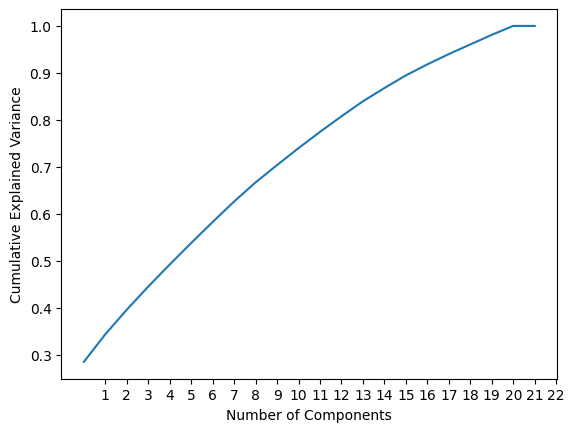

In [ ]:
#Run PCA
def runPCA():
  features = autism_data.columns
  x = autism_data.loc[:, features].values
  x = StandardScaler().fit_transform(x)

  #Code to determine elbow point (at 22)
  pca = PCA().fit(x)
  plt.plot(np.cumsum(pca.explained_variance_ratio_))
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))

  plt.show()

runPCA()

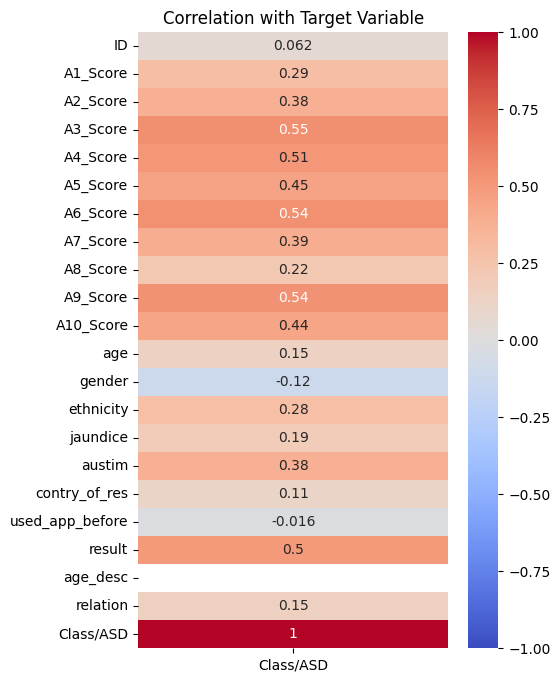

In [ ]:
#Features correlation with the Class/ASD
corr = autism_data.corr()

# Extract the correlation with the target variable
target_corr = corr[['Class/ASD']]

# Convert to DataFrame for heatmap

# Heatmap of correlation between each feature and Class/ASD
plt.figure(figsize=(5, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target Variable')
plt.show()

#Based on graph the most correlated features are A3_Score, A6_Score, A9_Score and the least correlated is gender and used_app_before

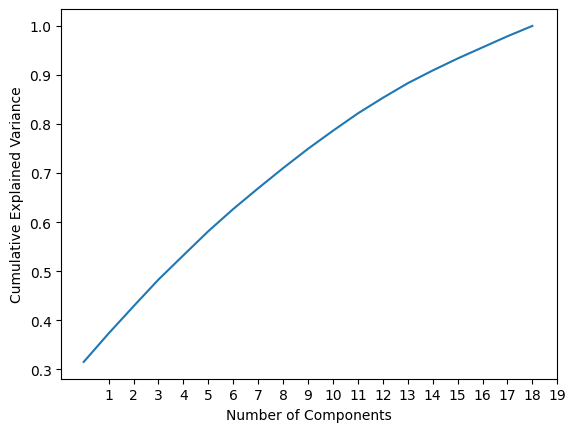

In [ ]:
#Remove columns that aren't useful

#Remove ID Column - unique on each row
autism_data = autism_data.drop(columns=['ID'])

# age_desc is always "18 and more"
autism_data = autism_data.drop(columns=['age_desc'])

#Very low correlation (from the heatmap)
autism_data = autism_data.drop(columns=['used_app_before'])

runPCA()

**Obtain final X and Y vectors and split train and test data**

In [ ]:
# Exclude the target variable from the original features
final_X = autism_data.drop(columns=['Class/ASD'])

#final y vector with the labels for each of the samples
final_Y = autism_data['Class/ASD']

# Spliting dataset into training and testing sections using the train_test_split function.
train_X, test_X, train_Y, test_Y = train_test_split(final_X, final_Y, test_size=0.15, random_state=23)

# Data Visualization

**Data Visualization**

Includes:
1.   Gender distribution with Class/ASD
2.   Jaundice distribution with Class/ASD
3.   Austim distribution with Class/ASD
4.   Heatmap correlation of each feature with Class/ASD
5.   Heatmap correalation of each feature and target with each other





<Axes: xlabel='gender', ylabel='Class/ASD'>

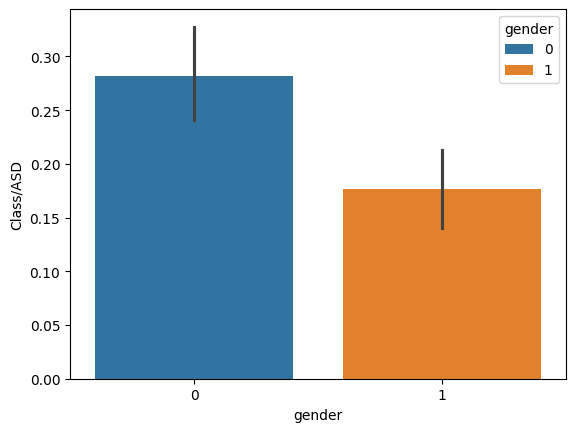

In [ ]:
#Gender and Class/ASD distribution
sns.barplot(x='gender', y='Class/ASD', hue='gender', data = autism_data)

<Axes: xlabel='jaundice', ylabel='Class/ASD'>

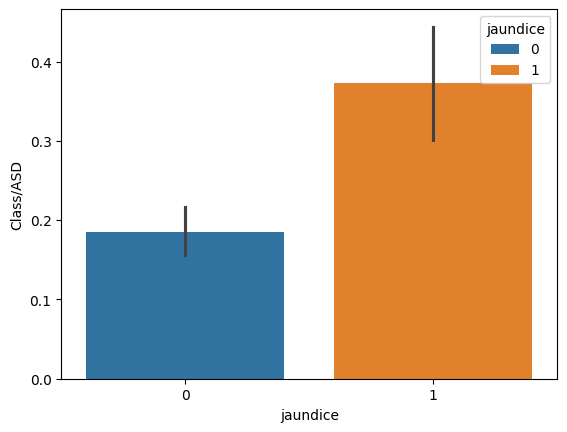

In [ ]:
#Jaundice and Class/ASD distribution
sns.barplot(x='jaundice', y='Class/ASD', hue='jaundice', data = autism_data)

<Axes: xlabel='austim', ylabel='Class/ASD'>

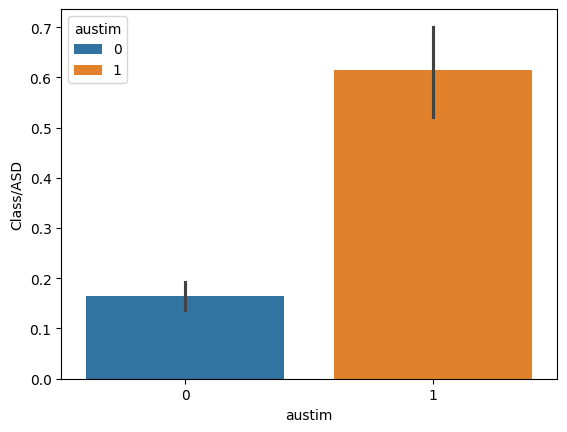

In [ ]:
#austim and Class/ASD distribution
sns.barplot(x='austim', y='Class/ASD', hue= 'austim', data = autism_data)

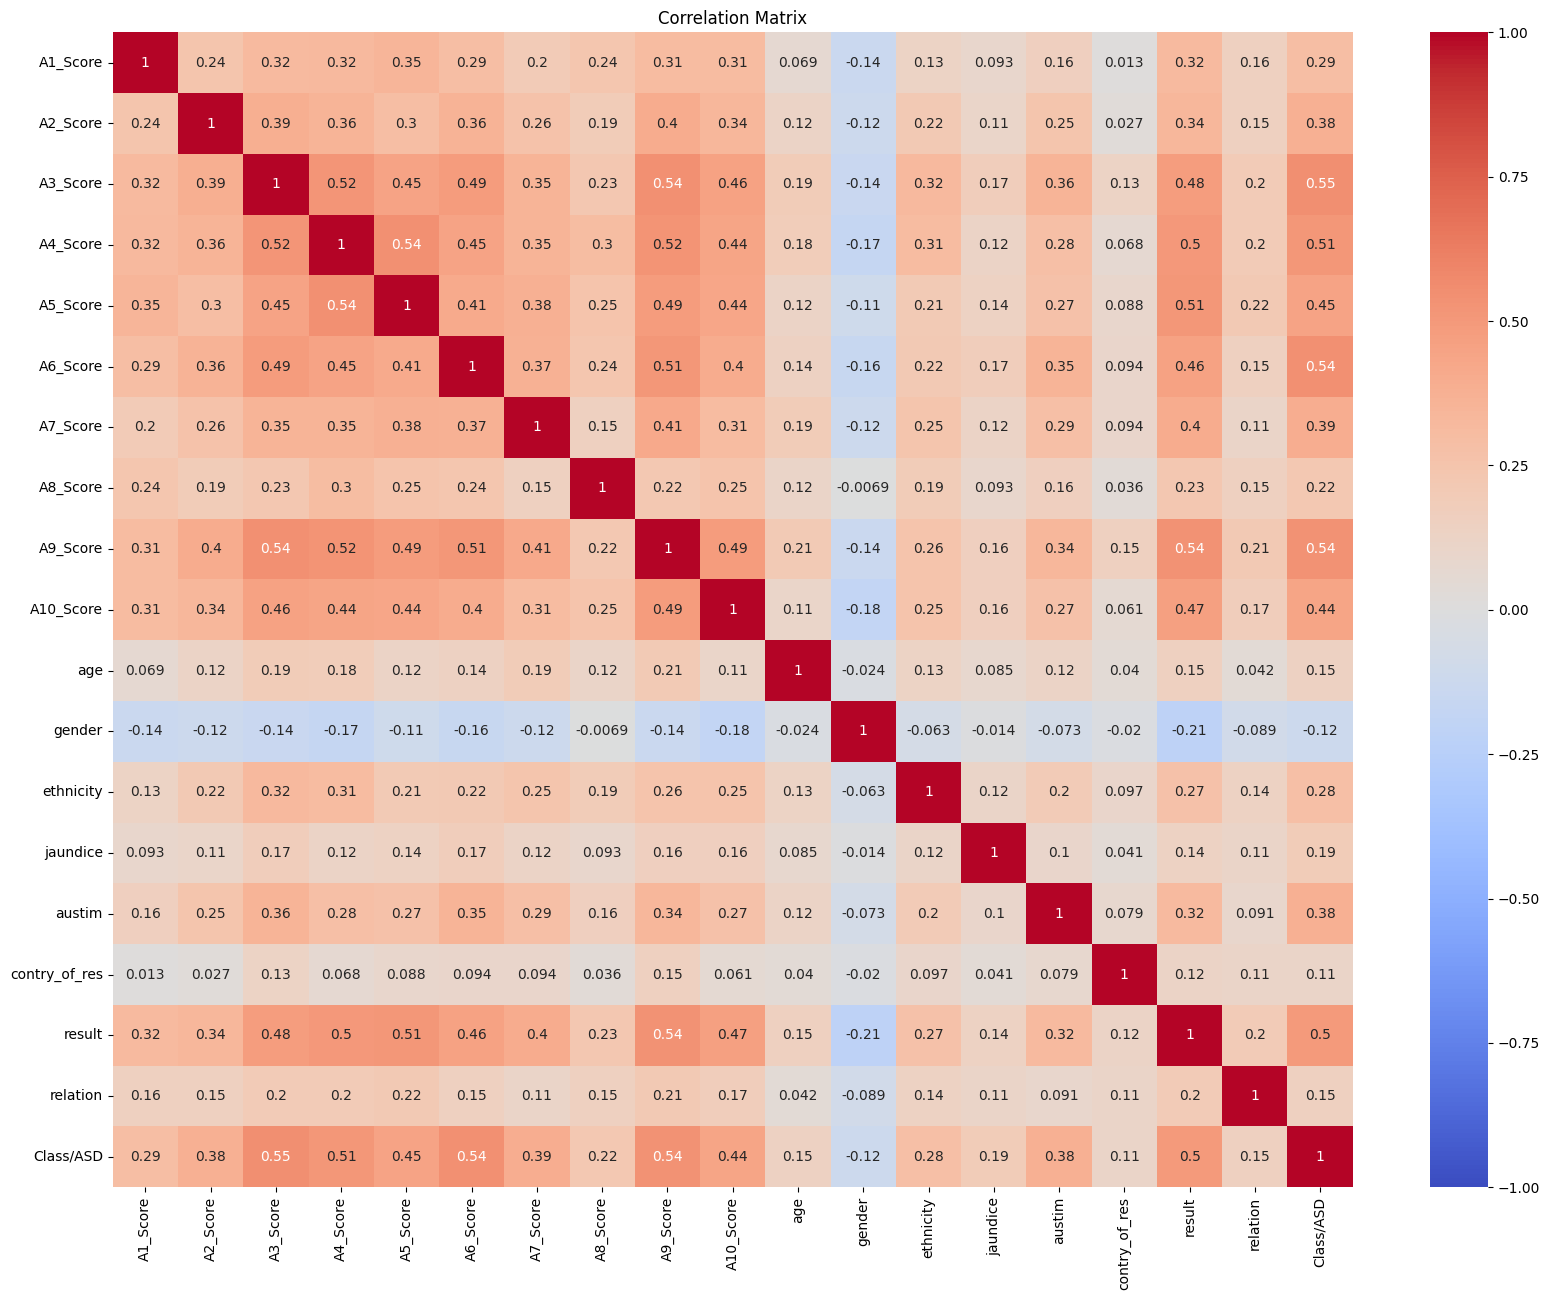

In [ ]:
# Cofounding: Features correlation with each other
# Heatmap of correlation between each feature
corr = autism_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Models


**Model #1: Logistic regression**

Confusion Matrix:
[[86  7]
 [ 6 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        93
           1       0.75      0.78      0.76        27

    accuracy                           0.89       120
   macro avg       0.84      0.85      0.85       120
weighted avg       0.89      0.89      0.89       120

Logistic Regression Model Accuracy: 89.17%


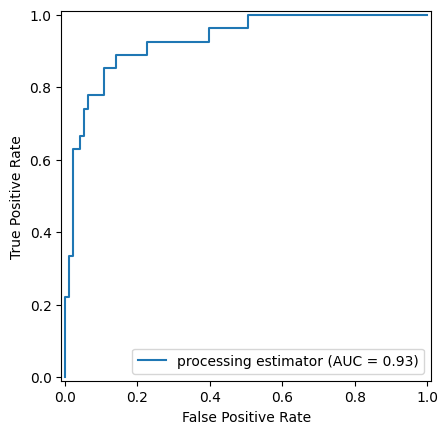

 
Feature: A4_Score, Rank: 1
Feature: A6_Score, Rank: 2
Feature: A3_Score, Rank: 3
Feature: A9_Score, Rank: 4
Feature: A10_Score, Rank: 5
Feature: austim, Rank: 6
Feature: A5_Score, Rank: 7
Feature: A7_Score, Rank: 8
Feature: jaundice, Rank: 9
Feature: A2_Score, Rank: 10
Feature: A1_Score, Rank: 11
Feature: gender, Rank: 12
Feature: A8_Score, Rank: 13
Feature: result, Rank: 14
Feature: ethnicity, Rank: 15
Feature: relation, Rank: 16
Feature: contry_of_res, Rank: 17
Feature: age, Rank: 18
 


In [ ]:
# Initialize the logistic regression model
log_reg = LogisticRegression(solver='lbfgs',max_iter=1000,random_state=23)

# Fit the model on the training data
log_reg.fit(train_X, train_Y)

# Make predictions on the test data
pred_Y_log = log_reg.predict(test_X)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(test_Y, pred_Y_log))

print("\nClassification Report:")
print(classification_report(test_Y, pred_Y_log))

scorelog = accuracy_score(test_Y, pred_Y_log)
print('Logistic Regression Model Accuracy: {:.2%}'.format(scorelog))

#Display ROC curve
pred_prob_log = log_reg.predict_proba(test_X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_Y, pred_prob_log, pos_label=log_reg.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='processing estimator')
display.plot()
plt.show()


#Check feature importance for logistic regression
rfe = RFE(estimator=LogisticRegression(solver='lbfgs',max_iter=1000, random_state=23), n_features_to_select=1, step=1)
rfe = rfe.fit(train_X, train_Y)
ranking = rfe.ranking_

feature_names = train_X.columns
print(" ")
for rank, feature in sorted(zip(ranking, feature_names)):
    print(f"Feature: {feature}, Rank: {rank}")
print(" ")

**Model #2: Random Forest**

Confusion Matrix:
[[86  7]
 [ 8 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        93
           1       0.73      0.70      0.72        27

    accuracy                           0.88       120
   macro avg       0.82      0.81      0.82       120
weighted avg       0.87      0.88      0.87       120

Random Forest Model Accuracy: 87.50%


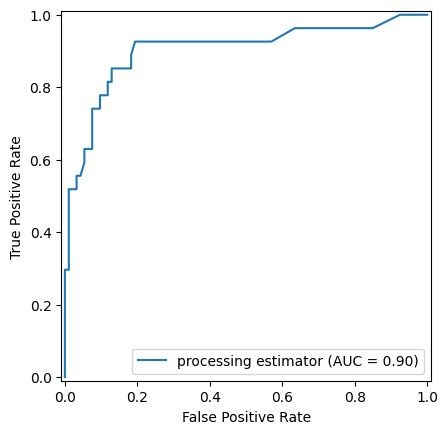

 
Feature: result, Rank: 1
Feature: age, Rank: 2
Feature: A3_Score, Rank: 3
Feature: contry_of_res, Rank: 4
Feature: A6_Score, Rank: 5
Feature: A9_Score, Rank: 6
Feature: ethnicity, Rank: 7
Feature: A4_Score, Rank: 8
Feature: A5_Score, Rank: 9
Feature: A10_Score, Rank: 10
Feature: A7_Score, Rank: 11
Feature: A1_Score, Rank: 12
Feature: A2_Score, Rank: 13
Feature: austim, Rank: 14
Feature: jaundice, Rank: 15
Feature: relation, Rank: 16
Feature: gender, Rank: 17
Feature: A8_Score, Rank: 18
 


In [ ]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=23)

# Fit the model on the training data
rf_clf.fit(train_X, train_Y)

# Make predictions on the test data
pred_Y_rf = rf_clf.predict(test_X)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(test_Y, pred_Y_rf))

print("\nClassification Report:")
print(classification_report(test_Y, pred_Y_rf))

scorerf = accuracy_score(test_Y, pred_Y_rf)
print('Random Forest Model Accuracy: {:.2%}'.format(scorerf))

#Display ROC curve
pred_prob_rf = rf_clf.predict_proba(test_X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_Y, pred_prob_rf, pos_label=rf_clf.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='processing estimator')
display.plot()
plt.show()

#Display feature importance for random forest
rfe_rf = RFE(estimator= RandomForestClassifier(), n_features_to_select=1, step=1)
rfe_rf = rfe_rf.fit(train_X, train_Y)
ranking = rfe_rf.ranking_

feature_names = train_X.columns
print(" ")
for rank, feature in sorted(zip(ranking, feature_names)):
    print(f"Feature: {feature}, Rank: {rank}")
print(" ")

**Model #3: SVM (Support Vector Machine)**

Confusion Matrix:
[[86  7]
 [ 6 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        93
           1       0.75      0.78      0.76        27

    accuracy                           0.89       120
   macro avg       0.84      0.85      0.85       120
weighted avg       0.89      0.89      0.89       120

SVM (Support Vector Machine) Model Accuracy: 89.17%


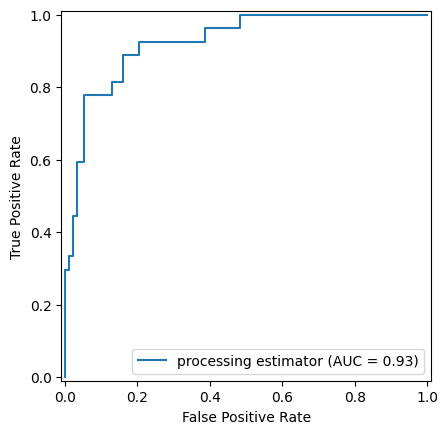

 
Feature: A6_Score, Rank: 1
Feature: A4_Score, Rank: 2
Feature: A3_Score, Rank: 3
Feature: A5_Score, Rank: 4
Feature: A7_Score, Rank: 5
Feature: austim, Rank: 6
Feature: A9_Score, Rank: 7
Feature: jaundice, Rank: 8
Feature: A10_Score, Rank: 9
Feature: A2_Score, Rank: 10
Feature: gender, Rank: 11
Feature: relation, Rank: 12
Feature: result, Rank: 13
Feature: A1_Score, Rank: 14
Feature: ethnicity, Rank: 15
Feature: contry_of_res, Rank: 16
Feature: A8_Score, Rank: 17
Feature: age, Rank: 18
 


In [ ]:
# Initialize the SVM classifier
svm_clf = SVC(kernel='linear', probability=True,  random_state=23)

# Fit the model on the training data
svm_clf.fit(train_X, train_Y)

# Make predictions on the test data
pred_Y_svm = svm_clf.predict(test_X)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(test_Y, pred_Y_svm))

print("\nClassification Report:")
print(classification_report(test_Y, pred_Y_svm))

scoresvm = accuracy_score(test_Y, pred_Y_svm)
print('SVM (Support Vector Machine) Model Accuracy: {:.2%}'.format(scoresvm))

#Display ROC curve
pred_prob_svm = svm_clf.predict_proba(test_X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_Y, pred_prob_svm, pos_label=svm_clf.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='processing estimator')
display.plot()
plt.show()

#Display feature importance for SVM
rfe_svm = RFE(estimator=SVC(kernel='linear'), n_features_to_select=1, step=1)
rfe_svm = rfe_svm.fit(train_X, train_Y)
ranking = rfe_svm.ranking_

feature_names = train_X.columns
print(" ")
for rank, feature in sorted(zip(ranking, feature_names)):
    print(f"Feature: {feature}, Rank: {rank}")
print(" ")

**Model #4: Decision trees**

Confusion Matrix:
[[78 15]
 [13 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        93
           1       0.48      0.52      0.50        27

    accuracy                           0.77       120
   macro avg       0.67      0.68      0.67       120
weighted avg       0.77      0.77      0.77       120

Decision Trees Model Accuracy: 76.67%


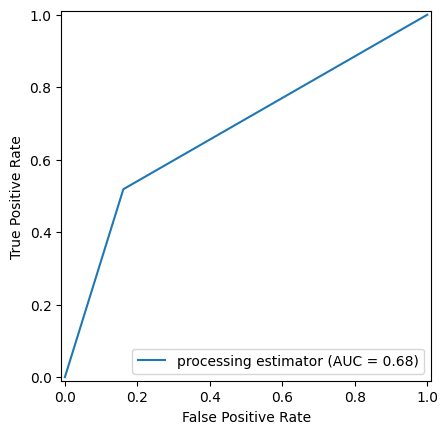

In [ ]:
# Initialize the Decision Trees classifier
dt_clf = DecisionTreeClassifier(random_state=23)

# Fit the model on the training data
dt_clf.fit(train_X, train_Y)

# Make predictions on the test data
pred_Y_dt = dt_clf.predict(test_X)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(test_Y, pred_Y_dt))

print("\nClassification Report:")
print(classification_report(test_Y, pred_Y_dt))

scoredt = accuracy_score(test_Y, pred_Y_dt)
print('Decision Trees Model Accuracy: {:.2%}'.format(scoredt))

#Display ROC curve
pred_prob_dt = dt_clf.predict_proba(test_X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_Y, pred_prob_dt, pos_label=dt_clf.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='processing estimator')
display.plot()
plt.show()

**Model #5: Ridge Classifier**

In [ ]:
# Initialize the Ridge classifier
r_clf = RidgeClassifier(random_state=23)

# Fit the model on the training data
r_clf.fit(train_X, train_Y)

# Make predictions on the test data
pred_Y_r = r_clf.predict(test_X)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(test_Y, pred_Y_r))

print("\nClassification Report:")
print(classification_report(test_Y, pred_Y_r))

scorer = accuracy_score(test_Y, pred_Y_r)
print('Ridge Classifier Model Accuracy: {:.2%}'.format(scorer))


Confusion Matrix:
[[85  8]
 [ 6 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        93
           1       0.72      0.78      0.75        27

    accuracy                           0.88       120
   macro avg       0.83      0.85      0.84       120
weighted avg       0.89      0.88      0.88       120

Ridge Classifier Model Accuracy: 88.33%


**Model #6: kNeighbors Classifier**

Confusion Matrix:
[[83 10]
 [15 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        93
           1       0.55      0.44      0.49        27

    accuracy                           0.79       120
   macro avg       0.70      0.67      0.68       120
weighted avg       0.78      0.79      0.78       120

KNeighbors Classifier Model Accuracy: 79.17%


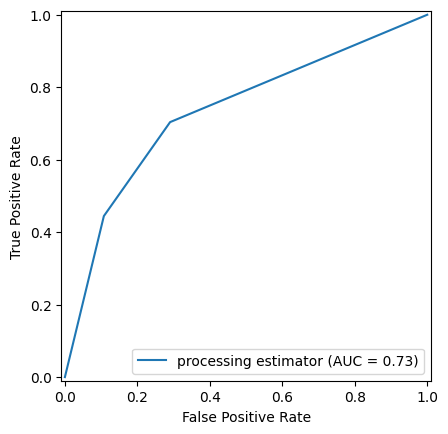

Feature Scores:
Feature: A3_Score, Score: 293.4969331949039
Feature: A6_Score, Score: 276.1421593003189
Feature: A9_Score, Score: 275.3144840878803
Feature: A4_Score, Score: 234.01960636537316
Feature: result, Score: 209.5753062187425
Feature: A5_Score, Score: 169.5280598167973
Feature: A10_Score, Score: 156.86165660085206
Feature: A7_Score, Score: 128.25677982840142
Feature: A2_Score, Score: 115.50456970373705
Feature: austim, Score: 109.5770083699453
Feature: ethnicity, Score: 66.60768015347382
Feature: A1_Score, Score: 58.05307345156446
Feature: A8_Score, Score: 31.946390122755925
Feature: jaundice, Score: 30.829377921634286
Feature: age, Score: 17.042121757069335
Feature: contry_of_res, Score: 15.555847843367236
Feature: relation, Score: 14.636161626604352
Feature: gender, Score: 7.704956933138971
 


In [ ]:
# Initialize the  KNeighbors classifier
kN_clf = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
kN_clf.fit(train_X, train_Y)

# Make predictions on the test data
pred_Y_KN = kN_clf.predict(test_X)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(test_Y, pred_Y_KN))

print("\nClassification Report:")
print(classification_report(test_Y, pred_Y_KN))

scoreKN = accuracy_score(test_Y, pred_Y_KN)
print('KNeighbors Classifier Model Accuracy: {:.2%}'.format(scoreKN))

#Display ROC curve
pred_prob_kN = kN_clf.predict_proba(test_X)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_Y, pred_prob_kN, pos_label=kN_clf.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='processing estimator')
display.plot()
plt.show()

#Display feature importance for kNeighbors classifier
knn_model = KNeighborsClassifier()
selector = SelectKBest(score_func=f_classif, k=10)
pipeline = Pipeline([
    ('feature_selection', selector),
    ('classification', knn_model)
])

pipeline.fit(train_X, train_Y)
scores = selector.scores_
feature_names = train_X.columns
print("Feature Scores:")
for score, feature in sorted(zip(scores, feature_names), reverse=True):
    print(f"Feature: {feature}, Score: {score}")
print(" ")

# Average Accuracy of each Model

**Average Model Accuracy test:**

In [ ]:
#Take Average Accuracy of each of the 6 models
#Initialize variables and lists

ScoreAvgLog = 0
ScoreAvgRF = 0
ScoreAvgSVM = 0
ScoreAvgDT = 0
ScoreAvgR = 0
ScoreAvgKN = 0

for i in range(15):
    randomState = random.randint(1, 100)
    train_X_test, test_X_test, train_Y_test, test_Y_test = train_test_split(final_X, final_Y, test_size=0.15, random_state=randomState)

    # Scale the data
    scaler = StandardScaler()
    train_X_test = scaler.fit_transform(train_X_test)
    test_X_test = scaler.transform(test_X_test)

    # Logistic Regression
    log_reg_test = LogisticRegression(solver='liblinear', random_state=randomState, max_iter=1000)
    log_reg_test.fit(train_X_test, train_Y_test)
    pred_Y_log_test = log_reg_test.predict(test_X_test)
    scorelog = accuracy_score(test_Y_test, pred_Y_log_test)
    ScoreAvgLog += int(scorelog*100)

    # Random Forest
    rf_clf_test = RandomForestClassifier(n_estimators=200,  random_state=randomState)
    rf_clf_test.fit(train_X_test, train_Y_test)
    pred_Y_rf_test = rf_clf_test.predict(test_X_test)
    scoreRF = accuracy_score(test_Y_test, pred_Y_rf_test)
    ScoreAvgRF += int(scoreRF*100)

    # SVM
    svm_clf_test = SVC(kernel='linear',  random_state=randomState)
    svm_clf_test.fit(train_X_test, train_Y_test)
    pred_Y_svm_test = svm_clf_test.predict(test_X_test)
    scoreSVM = accuracy_score(test_Y_test, pred_Y_svm_test)
    ScoreAvgSVM += int(scoreSVM*100)

    # Decision Tree
    dt_clf_test = DecisionTreeClassifier(random_state=randomState)
    dt_clf_test.fit(train_X_test, train_Y_test)
    pred_Y_dt_test = dt_clf_test.predict(test_X_test)
    scoreDT = accuracy_score(test_Y_test, pred_Y_dt_test)
    ScoreAvgDT += int(scoreDT*100)

    #Ridge Classifiwr
    r_clf_test = RidgeClassifier(random_state=randomState)
    r_clf_test.fit(train_X, train_Y)
    pred_Y_r_test = r_clf_test.predict(test_X)
    scoreR = accuracy_score(test_Y_test, pred_Y_r_test)
    ScoreAvgR += int(scoreR*100)

    #KNeighbors Classifier
    kN_clf_test = KNeighborsClassifier(n_neighbors=3)
    kN_clf_test.fit(train_X_test, train_Y_test)
    pred_Y_KN_test = kN_clf_test.predict(test_X_test)
    scoreKN = accuracy_score(test_Y_test, pred_Y_KN_test)
    ScoreAvgKN += int(scoreKN*100)

#Print Results
print('Random Forest Model Accuracy: \t\t{:.2%}'.format(ScoreAvgRF/1500))
print('Logistic Regression Model Accuracy: \t{:.2%}'.format(ScoreAvgLog/1500))
print('SVM Model Accuracy: \t\t\t{:.2%}'.format(ScoreAvgSVM/1500))
print('Decision Tree Model Accuracy: \t\t{:.2%}'.format(ScoreAvgDT/1500))
print('Ridge Classifier Model Accuracy: \t{:.2%}'.format(ScoreAvgR/1500))
print('KN Classifier Model Accuracy: \t\t{:.2%}'.format(ScoreAvgKN/1500))

Random Forest Model Accuracy: 86.87%
Logistic Regression Model Accuracy: 86.07%
SVM Model Accuracy: 85.93%
Decision Tree Model Accuracy: 80.73%
Ridge Classifier Model Accuracy: 62.93%
KN Classifier Model Accuracy: 85.53%


# Neural Networks

**Sckit Neural Network Classification model:**

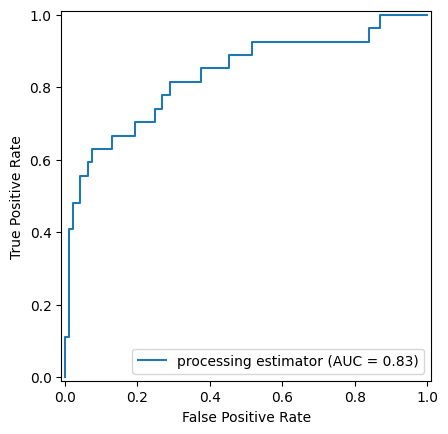

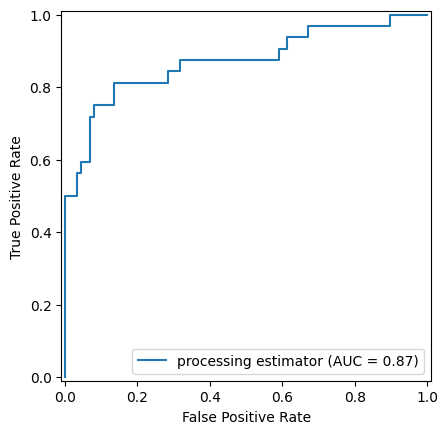

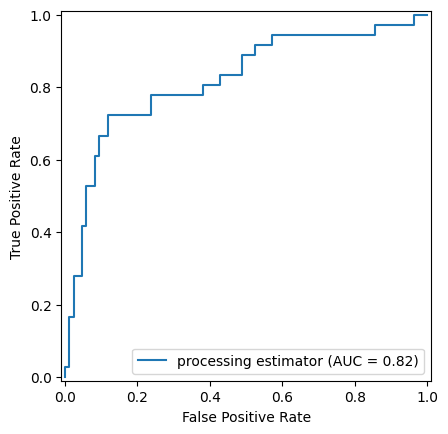

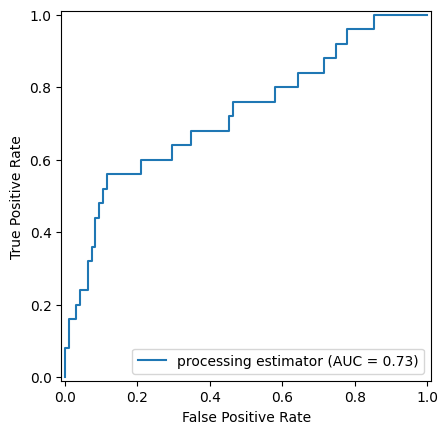

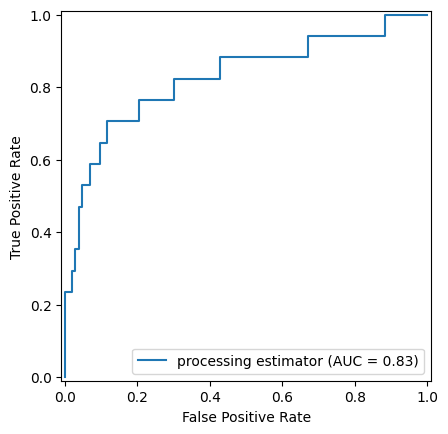

Average Accuracy: 83.40
[84, 85, 80, 80, 88]


In [ ]:
ScoresNN = []

for i in range(5):
  randomState = random.randint(1, 100)
  X_trainNN, X_testNN, Y_trainNN, Y_testNN = train_test_split(final_X, final_Y, test_size=0.15, random_state=randomState)

  scaler = StandardScaler()
  X_trainNN = scaler.fit_transform(X_trainNN)
  X_testNN = scaler.transform(X_testNN)

  modelNN = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, activation='relu', solver='adam', learning_rate_init=0.001, alpha=0.001, batch_size=10)

  modelNN.fit(X_trainNN, Y_trainNN)
  predictNN = modelNN.predict(X_testNN)

  scoreNN = accuracy_score(Y_testNN, predictNN )
  ScoresNN.append((int(scoreNN*100)))

  #Display ROC curve
  pred_prob_NN = modelNN.predict_proba(X_testNN)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(Y_testNN, pred_prob_NN)
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='processing estimator')
  display.plot()
  plt.show()

average_accuracy = sum(ScoresNN) / len(ScoresNN)
print(f'Average Accuracy: {average_accuracy:.2f}')


**TensorFlow Neural Network Classification model:**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8992 - loss: 0.3042  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


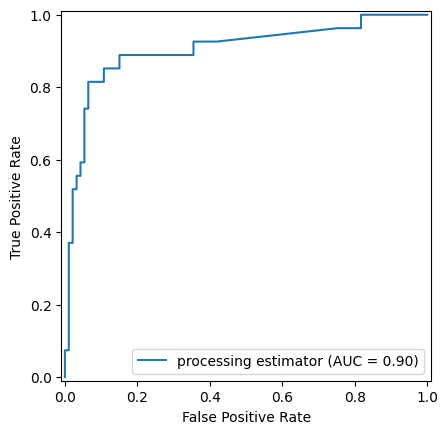

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8217 - loss: 0.4775  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


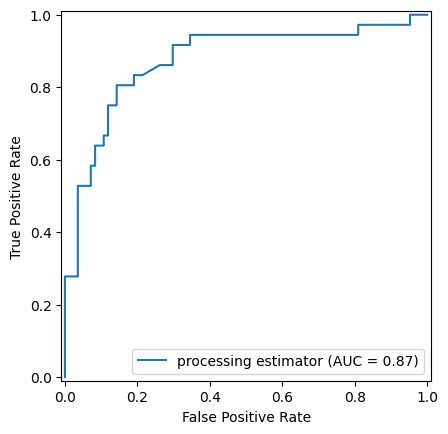

Average Accuracy: 0.85


In [ ]:
ScoresNNtf = []

for i in range(5):
    randomState = random.randint(1, 100)
    X_trainNNtf, X_testNNtf, Y_trainNNtf, Y_testNNtf = train_test_split(final_X, final_Y, test_size=0.15, random_state=randomState)

    scaler = StandardScaler()
    X_trainNNtf = scaler.fit_transform(X_trainNNtf)
    X_testNNtf = scaler.transform(X_testNNtf)

    Y_trainNNtf = to_categorical(Y_trainNNtf)
    Y_testNNtf = to_categorical(Y_testNNtf)

    modelNNtf = Sequential()
    modelNNtf.add(Dense(480, activation='relu', kernel_regularizer=l2(0.01), input_shape=(int(X_trainNNtf.shape[1]),)))
    modelNNtf.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    modelNNtf.add(Dense(2, activation='softmax'))

    modelNNtf.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    modelNNtf.fit(X_trainNNtf, Y_trainNNtf, epochs=200, batch_size=10, verbose=0)
    evaluate = modelNNtf.evaluate(X_testNNtf, Y_testNNtf)

    ScoresNNtf.append(evaluate[1])

    #Display ROC curve
    pred_prob_NNtf = modelNNtf.predict(X_testNNtf)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(Y_testNNtf[:, 1], pred_prob_NNtf)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='processing estimator')
    display.plot()
    plt.show()

average_accuracy = sum(ScoresNNtf) / len(ScoresNNtf)
print(f'Average Accuracy: {average_accuracy:.2f}')


# Testing Best Models w/ different Features

**Test Models with only the test Scores**

In [ ]:
#Create new dataframe with only Autism test scores data (testing to see if it performs better with only cognitive scores)
dfAutismScores = autism_data.iloc[:,:10]
dfAutismScores.head()
train_XScores, test_XScores, train_YScores, test_YScores = train_test_split(dfAutismScores, final_Y, test_size=0.15, random_state=23)

Confusion Matrix:
[[86  7]
 [ 7 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.74      0.74      0.74        27

    accuracy                           0.88       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.88      0.88      0.88       120

Logistic Regression Model Accuracy: 88.33%


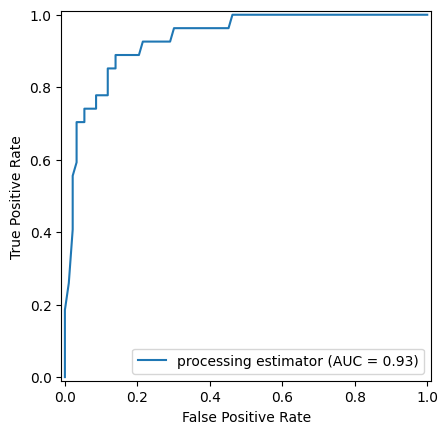

In [ ]:
#Logistic Regression with new dataframe

log_regScores = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=23)
log_regScores.fit(train_XScores, train_YScores)
pred_Y_log_Scores = log_regScores.predict(test_XScores)
print("Confusion Matrix:")
print(confusion_matrix(test_YScores, pred_Y_log_Scores))

print("\nClassification Report:")
print(classification_report(test_YScores, pred_Y_log_Scores))

scorelog_Scores = accuracy_score(test_YScores, pred_Y_log_Scores)
print('Logistic Regression Model Accuracy: {:.2%}'.format(scorelog_Scores))

#Display ROC curve
pred_prob_logScores = log_regScores.predict_proba(test_XScores)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_YScores, pred_prob_logScores, pos_label=log_regScores.classes_[1])
#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='processing estimator')
display.plot()
plt.show()

Confusion Matrix:
[[86  7]
 [ 8 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        93
           1       0.73      0.70      0.72        27

    accuracy                           0.88       120
   macro avg       0.82      0.81      0.82       120
weighted avg       0.87      0.88      0.87       120

Random Forest Model Accuracy: 87.50%


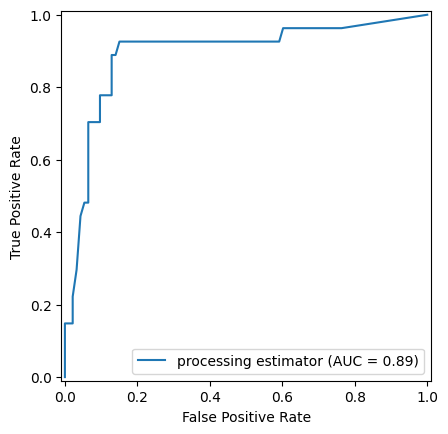

In [ ]:
#Random Forest with new dataframe

rf_clfScores = RandomForestClassifier(n_estimators=200, random_state=23)
rf_clfScores.fit(train_XScores, train_YScores)
pred_Y_rfScores = rf_clfScores.predict(test_XScores)

print("Confusion Matrix:")
print(confusion_matrix(test_YScores, pred_Y_rfScores))

print("\nClassification Report:")
print(classification_report(test_YScores, pred_Y_rfScores))

scorerfScores = accuracy_score(test_YScores, pred_Y_rfScores)
print('Random Forest Model Accuracy: {:.2%}'.format(scorerfScores))

#Display ROC curve
pred_prob_rfScores = rf_clfScores.predict_proba(test_XScores)[:, 1]
fpr, tpr, _ = metrics.roc_curve(test_YScores, pred_prob_rfScores, pos_label=rf_clfScores.classes_[1])
#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='processing estimator')
display.plot()
plt.show()


**Having only Autism cognitive scores data yields worse results from the same models**